In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
automobile_data = pd.read_csv('datasets/automobile_data_processed.csv')

automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
220,17.0,8,260.0,110,4060,19.0,43
149,31.0,4,79.0,67,2000,16.0,46
334,27.2,4,135.0,84,2490,15.7,39
217,25.5,4,122.0,96,2300,15.5,43
315,34.3,4,97.0,78,2188,15.8,40


In [3]:
automobile_data.shape

(392, 7)

Text(0.5, 1.0, 'Miles per gallon')

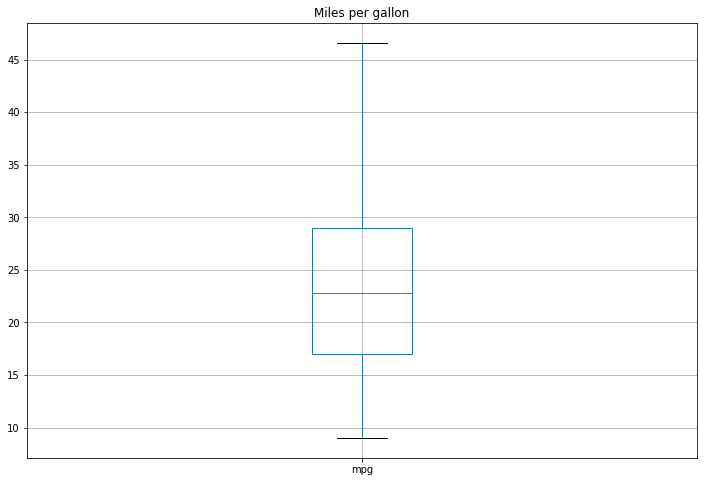

In [4]:
automobile_data.boxplot('mpg', figsize=(12, 8))

plt.title('Miles per gallon')

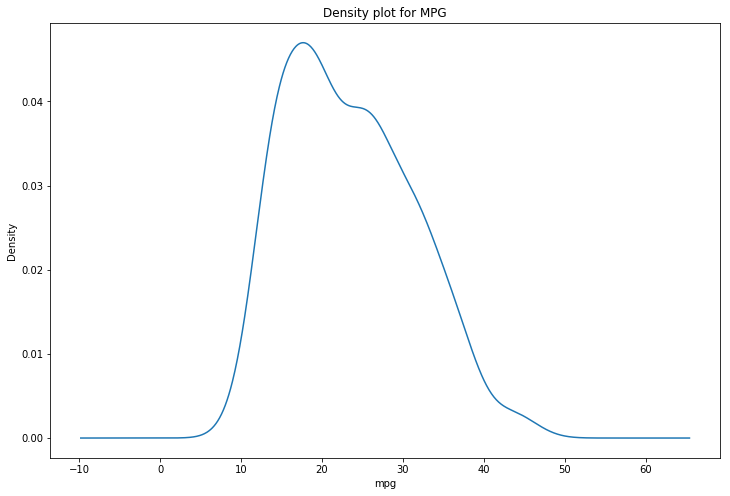

In [7]:
automobile_data['mpg'].plot.kde(figsize=(12, 8))

plt.xlabel('mpg')

plt.title('Density plot for MPG')
plt.show()

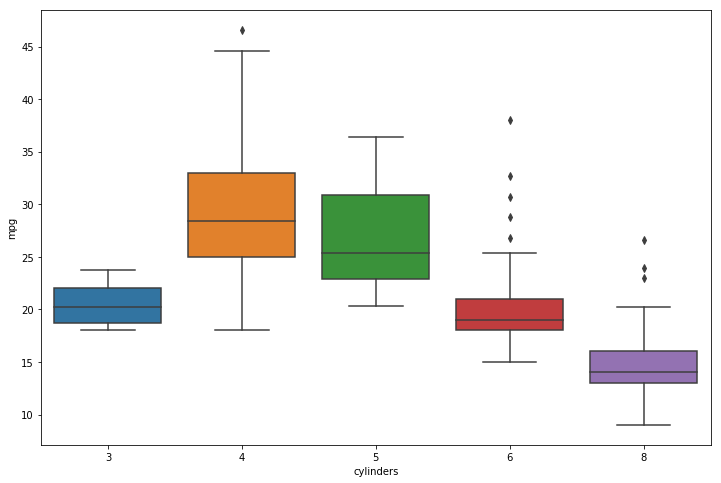

In [8]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='cylinders', y='mpg', data=automobile_data)

plt.show()

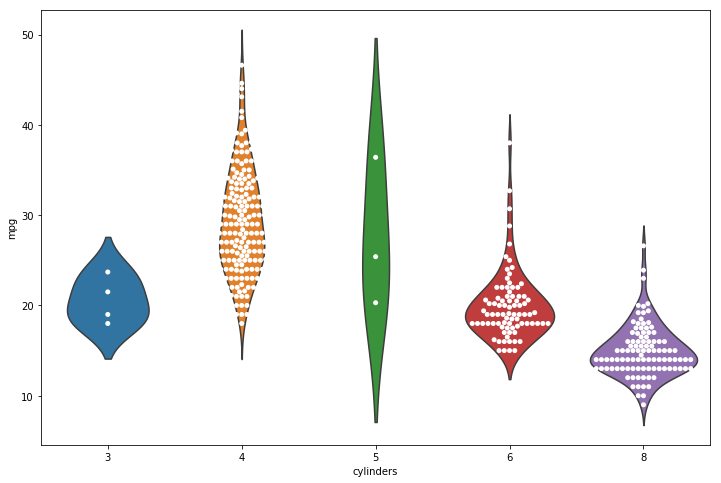

In [21]:
# This swarmplot represents the individual data points, which are the white spots
# The Violin plot is probably the probablity distribution curve


plt.figure(figsize=(12, 8))

sns.violinplot(x='cylinders', y='mpg', data=automobile_data, inner=None)
sns.swarmplot(x='cylinders', y='mpg', data=automobile_data, color='w')

plt.show()

In [22]:
cylinder_stats = automobile_data.groupby(['cylinders'])['mpg'].agg(['mean', 'count', 'std'])

cylinder_stats

,mean,count,std
cylinders,,,
3,20.550000,4,2.564501
4,29.283920,199,5.670546
5,27.366667,3,8.228204
6,19.973494,83,3.828809
8,14.963107,103,2.836284


In [12]:
# This calculates the 95th Confidence interval

ci95_high = []

ci95_low = []

In [13]:
for i in cylinder_stats.index:
    
    mean, count, std = cylinder_stats.loc[i]
    
    ci95_high.append(mean + 1.96 * (std / math.sqrt(count)))
    ci95_low.append(mean - 1.96 * (std / math.sqrt(count)))

In [14]:
cylinder_stats['ci95_HIGH'] = ci95_high
cylinder_stats['ci95_LOW'] = ci95_low

cylinder_stats

,mean,count,std,ci95_HIGH,ci95_LOW
cylinders,,,,,
3,20.550000,4,2.564501,23.063211,18.036789
4,29.283920,199,5.670546,30.071789,28.496050
5,27.366667,3,8.228204,36.677755,18.055578
6,19.973494,83,3.828809,20.797216,19.149772
8,14.963107,103,2.836284,15.510863,14.415351


In [15]:
cylinders = 4

cylinders4_df = automobile_data.loc[automobile_data['cylinders'] == cylinders]

cylinders4_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
111,19.0,4,122.0,85,2310,18.5,47
271,23.9,4,119.0,97,2405,14.9,42
313,24.3,4,151.0,90,3003,20.1,40
29,27.0,4,97.0,88,2130,14.5,49
299,34.2,4,105.0,70,2200,13.2,41
184,27.0,4,101.0,83,2202,15.3,44
55,26.0,4,91.0,70,1955,20.5,49
181,25.0,4,116.0,81,2220,16.9,44
240,21.5,4,121.0,110,2600,12.8,43
369,36.0,4,105.0,74,1980,15.3,38


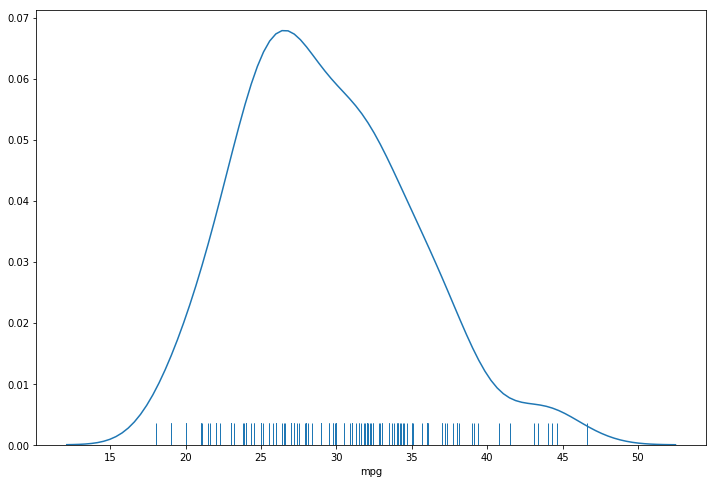

In [16]:
plt.figure(figsize=(12, 8))

sns.distplot(cylinders4_df['mpg'], rug=True, kde=True, hist=False)

plt.show()

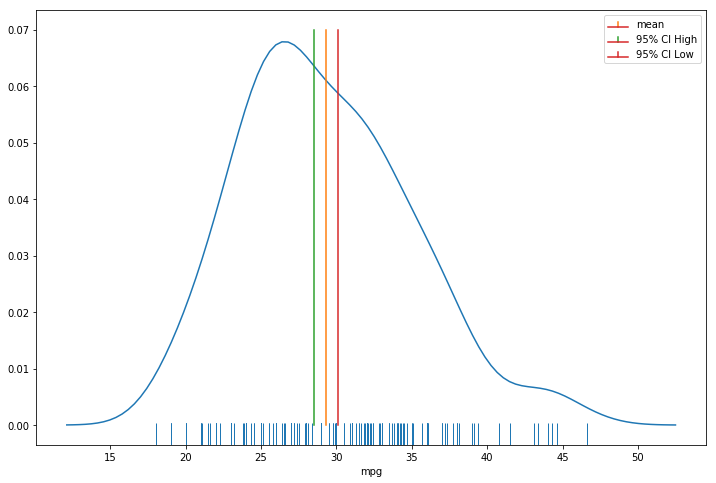

In [17]:
plt.figure(figsize=(12, 8))

sns.distplot(cylinders4_df['mpg'], rug=True, kde=True, hist=False)

plt.stem([cylinder_stats.loc[cylinders]['mean']], 
         [0.07], linefmt = 'C1', 
         markerfmt = 'C1', label = 'mean')

plt.stem([cylinder_stats.loc[cylinders]['ci95_LOW']], 
         [0.07], linefmt = 'C2', 
         markerfmt = 'C2', label = '95% CI High')

plt.stem([cylinder_stats.loc[cylinders]['ci95_HIGH']], 
         [0.07], linefmt = 'C3', 
         markerfmt = 'C3', label = '95% CI Low')

plt.xlabel('mpg')
plt.legend()
plt.show()

In [18]:
cylinders = 6

cylinders6_df = automobile_data.loc[automobile_data['cylinders'] == cylinders]

cylinders6_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
99,18.0,6,250.0,88,3021,16.5,47
255,19.4,6,232.0,90,3210,17.2,42
282,20.6,6,225.0,110,3360,16.6,41
32,19.0,6,232.0,100,2634,13.0,49
258,18.6,6,225.0,110,3620,18.7,42
197,20.0,6,225.0,100,3651,17.7,44
198,18.0,6,250.0,78,3574,21.0,44
256,20.6,6,231.0,105,3380,15.8,42
357,24.2,6,146.0,120,2930,13.8,39
224,20.5,6,231.0,105,3425,16.9,43


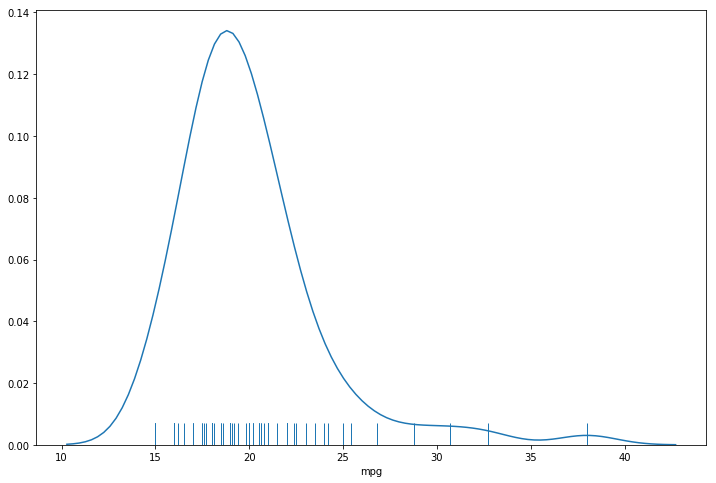

In [19]:
plt.figure(figsize=(12, 8))

sns.distplot(cylinders6_df['mpg'], rug=True, kde=True, hist=False)

plt.show()

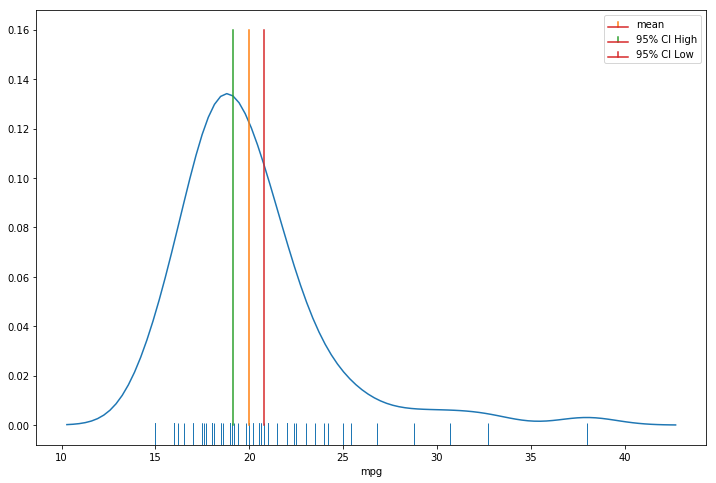

In [20]:
plt.figure(figsize=(12, 8))

sns.distplot(cylinders6_df['mpg'], rug=True, kde=True, hist=False)

plt.stem([cylinder_stats.loc[cylinders]['mean']], 
         [0.16], linefmt = 'C1', 
         markerfmt = 'C1', label = 'mean')

plt.stem([cylinder_stats.loc[cylinders]['ci95_LOW']], 
         [0.16], linefmt = 'C2', 
         markerfmt = 'C2', label = '95% CI High')

plt.stem([cylinder_stats.loc[cylinders]['ci95_HIGH']], 
         [0.16], linefmt = 'C3', 
         markerfmt = 'C3', label = '95% CI Low')

plt.xlabel('mpg')
plt.legend()
plt.show()